In [1]:
import pandas as pd
df = pd.read_csv('datasets/intl_footb_res_1872_2020.csv')
df.index.names=['match_id']
df.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
match_id,,,,,,,,,
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False


### International Football Results
Hierboven wordt een dataset ingeladen. Deze dataset bevat de score en informatie van internationale voetbalwedstrijden van 1872 tot 2020.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42105 entries, 0 to 42104
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        42105 non-null  object
 1   home_team   42105 non-null  object
 2   away_team   42105 non-null  object
 3   home_score  42105 non-null  int64 
 4   away_score  42105 non-null  int64 
 5   tournament  42105 non-null  object
 6   city        42105 non-null  object
 7   country     42105 non-null  object
 8   neutral     42105 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [3]:
df.describe()

,home_score,away_score
count,42105.000000,42105.000000
mean,1.743855,1.186439
std,1.752543,1.403749
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [4]:
df.loc[0:5, 'home_score'].head()

match_id
0    0
1    4
2    2
3    2
4    3
Name: home_score, dtype: int64

Hierboven zijn de thuisgoals weergegeven van de eerste 5 entries in de dataset.

In [5]:
df.query("home_score > 16")

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
match_id,,,,,,,,,
7918,1971-09-13,Tahiti,Cook Islands,30,0,South Pacific Games,Papeete,French Polynesia,False
10965,1979-08-30,Fiji,Kiribati,24,0,South Pacific Games,Nausori,Fiji,False
10968,1979-08-30,Tahiti,Tuvalu,18,0,South Pacific Games,Suva,Fiji,True
22496,2000-01-26,China PR,Guam,19,0,AFC Asian Cup qualification,Hanoi,Vietnam,True
22583,2000-02-14,Kuwait,Bhutan,20,0,AFC Asian Cup qualification,Kuwait City,Kuwait,False
23050,2000-06-19,Australia,Cook Islands,17,0,Oceania Nations Cup,Papeete,French Polynesia,True
23471,2000-11-24,Iran,Guam,19,0,FIFA World Cup qualification,Tabriz,Iran,False
23809,2001-04-09,Australia,Tonga,22,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
23812,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False


Hierboven wordt gezocht in de dataset naar alle wedstrijden waarin de thuispartij meer dan 16 doelpunten heeft gemaakt.

In [6]:
matches = df.query('city == "Amsterdam" and home_team == "Netherlands" and tournament != "Friendly"').copy()
goal_diff = (matches["home_score"] - matches["away_score"])
matches["goal_diff"] = goal_diff

Hierboven worden alle wedstrijden weergegeven waarin het Nederlands Elftal in eigen huis heeft gewonnen. 
Hierbij zijn alle vriendschappelijke wedstrijden weggelaten.
Vervolgens wordt er gesorteerd op datum. Zo staat voor elke score de meeste recente overwinning bovenaan. 

In [7]:
def calc_match_wdl(goal_diff):
    if goal_diff > 0:
        result = 1,0,0
    elif goal_diff == 0:
        result = 0,1,0
    elif goal_diff < 0:
        result = 0,0,1
    return result



wdl = matches['goal_diff'].map(lambda gd: calc_match_wdl(gd)).to_list()
wdl = pd.DataFrame.from_records(wdl, columns=['w', 'd', 'l'], index=matches.index)
matches[['w', 'd', 'l']] = wdl
matches

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff,w,d,l
match_id,,,,,,,,,,,,,
1672,1934-04-08,Netherlands,Republic of Ireland,5,2,FIFA World Cup qualification,Amsterdam,Netherlands,False,3,1,0,0
4262,1957-09-25,Netherlands,Austria,1,1,FIFA World Cup qualification,Amsterdam,Netherlands,False,0,0,1,0
5271,1962-11-11,Netherlands,Switzerland,3,1,UEFA Euro qualification,Amsterdam,Netherlands,False,2,1,0,0
5474,1963-09-11,Netherlands,Luxembourg,1,1,UEFA Euro qualification,Amsterdam,Netherlands,False,0,0,1,0
6005,1965-10-17,Netherlands,Switzerland,0,0,FIFA World Cup qualification,Amsterdam,Netherlands,False,0,0,1,0
6595,1967-09-13,Netherlands,German DR,1,0,UEFA Euro qualification,Amsterdam,Netherlands,False,1,1,0,0
8736,1973-08-22,Netherlands,Iceland,5,0,FIFA World Cup qualification,Amsterdam,Netherlands,False,5,1,0,0
8837,1973-11-18,Netherlands,Belgium,0,0,FIFA World Cup qualification,Amsterdam,Netherlands,False,0,0,1,0
9518,1975-10-15,Netherlands,Poland,3,0,UEFA Euro qualification,Amsterdam,Netherlands,False,3,1,0,0


Hierboven worden 3 kolommen aan de DataFrame toegevoegd. 
Hierin staat of de wedstrijd een overwinning, verlies of gelijkspel voor Oranje heeft opgeleverd.

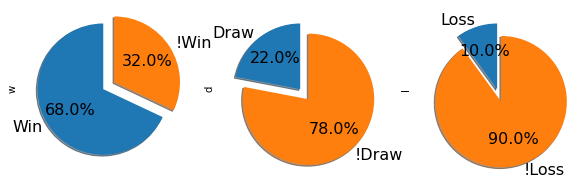

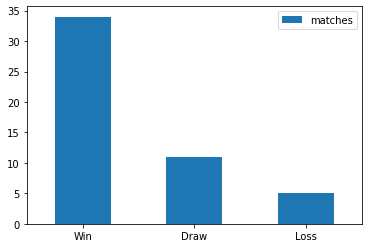

In [8]:
import matplotlib.pyplot as plt

def plot(data, label, **kwargs):
    ax = kwargs.get('ax', None)
    data.value_counts().sort_index(ascending=False).plot(kind='pie',
                                                         figsize=(10, 10),
                                                         explode=[0, 0.20],
                                                         labels=[label, '!' + label],
                                                         shadow=True,
                                                         startangle=90,
                                                         fontsize=16,
                                                         autopct = "%1.1f%%",
                                                         ax=ax);

fig, (w, d, l) = plt.subplots(1,3, figsize=(10, 10))
plot(matches['w'], "Win", ax=w);
plot(matches['d'], "Draw", ax=d);
plot(matches['l'], "Loss", ax=l);


w = matches['w'].value_counts().sort_index(ascending=False)[1]
d = matches['d'].value_counts().sort_index(ascending=False)[1]
l = matches['l'].value_counts().sort_index(ascending=False)[1]

wdl = pd.DataFrame({'':['Win', 'Draw', 'Loss'], 'matches':[w, d, l]})
wdl.plot.bar(x='', y='matches', rot=0);

Hierboven wordt met een pie chart weergegeven wat de verhouding is tussen Winst Gelijkspel en Verlies in de gekozen wedsrijden. Dit is puur om te kijken hoe een pie chart werkt, het is voor deze data alleen niet de meest praktische weergave. Daarom is er ook nog een bar grafiek weergegeven.